Import Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)
warnings.simplefilter(action='ignore',category=DeprecationWarning)

sns.set_style('darkgrid')

Load Data

In [2]:
df=pd.read_csv('E:/My Projects/Datasets/Ames Houses/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
X=df.drop('SalePrice',axis=1)
y=df.SalePrice

Describing dataset

In [4]:
numerical_columns=X.select_dtypes(exclude='object').columns
print(f"Our Dataset has {len(numerical_columns)} numerical columns : \n ",(numerical_columns))

Our Dataset has 37 numerical columns : 
  Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')


In [5]:
categorical_columns=X.select_dtypes(include='object').columns
print(f"Our Dataset has {len(categorical_columns)} Categorical columns : \n ",(categorical_columns))

Our Dataset has 43 Categorical columns : 
  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [6]:
file_path='E:/My Projects/Datasets/Ames Houses/Ames_Housing_Feature_Description.txt'
with open(file_path, 'r') as file:
    for line in file:
        print(line.strip())  # strip to remove newline characters

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

# 2. Exploratory Data Analysis

2.1. Sale Price

let's Explore target variable (Sale Price)

Text(0.5, 1.0, 'House Prices Distribution')

<Figure size 800x500 with 0 Axes>

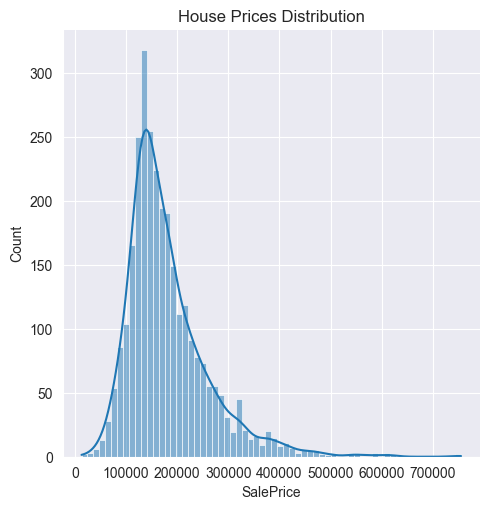

In [8]:
plt.figure(figsize=(8,5))
sns.displot(y,kde=True)
plt.title('House Prices Distribution')

The distribution of SalePrice is right-skewed. Let's check its Skewness and Kurtosis statistics.

In [9]:
print(f"Skewness of House prices is : ",y.skew())
print(f"Kurtosis of House prices is : ",y.kurtosis())

Skewness of House prices is :  1.7435000757376466
Kurtosis of House prices is :  5.118899951130896


2.2. Numerical Features

Top 15 numerical variables highly correlated with SalePrice:

In [10]:
correlation_with_SalePrice=df.select_dtypes(exclude='object').corr().SalePrice
abs(correlation_with_SalePrice).sort_values(ascending=False).head(16)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Name: SalePrice, dtype: float64

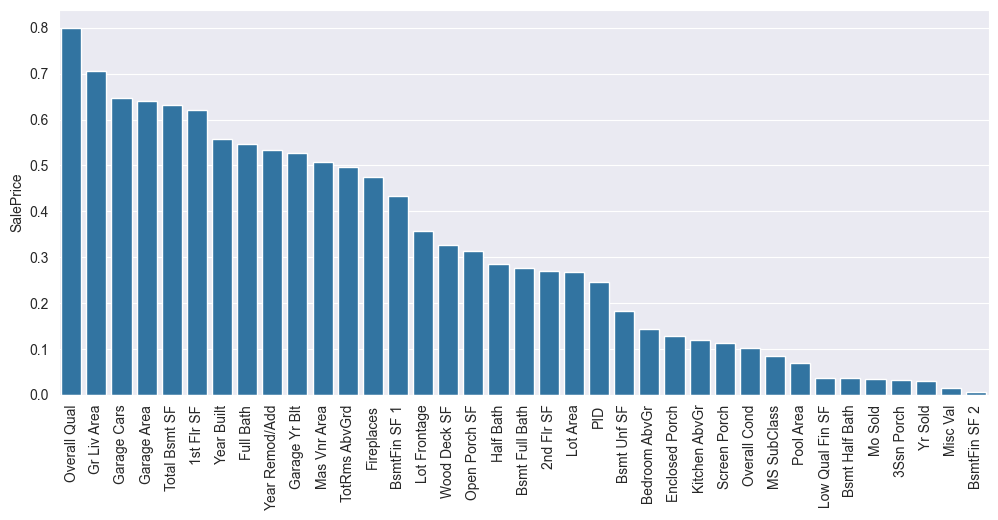

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(abs(correlation_with_SalePrice).sort_values(ascending=False)[1:])

plt.xticks(rotation=90);

What are the top Features selected by Recursive Feature Elimination techniques<br>

In [12]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

RFR=RandomForestRegressor(n_estimators=80,max_depth=15)
LR=LinearRegression()


In [13]:
def feature_selection(model):
    '''
    This Function will take any ML model and will return list of 15 most important featrures 
    '''
    selector=RFE(estimator=model,n_features_to_select=15,step=1)
    selector.fit(df.fillna(0).select_dtypes(exclude='object'),df['SalePrice'])
    selected_feature=list(df.select_dtypes(exclude='object').columns[selector.support_])
    return selected_feature

In [14]:
pd.DataFrame({
    'Feature_selector(RFR)':feature_selection(RFR),
    'Feature_selector(LR)':feature_selection(LR)
    })

,Feature_selector(RFR),Feature_selector(LR)
0,PID,Lot Frontage
1,Lot Frontage,Overall Qual
2,Lot Area,Overall Cond
3,Overall Cond,Bsmt Full Bath
4,Year Built,Bsmt Half Bath
5,Mas Vnr Area,Full Bath
6,1st Flr SF,Half Bath
7,2nd Flr SF,Bedroom AbvGr
8,Gr Liv Area,Kitchen AbvGr
9,Bsmt Half Bath,TotRms AbvGrd


Recursive Feature selector is working well with Linear regression model as most of feature slected by it also has high correlation with Sale Price

According to above analyses<br>
Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built, lot frontage<br>
are some of the most important features in determining house price.<br>
 Let's take a closer look at them.

Overall Quality

Overall quality is the most important feature in both analyses. It is clear that higher quality makes the house more expensiv

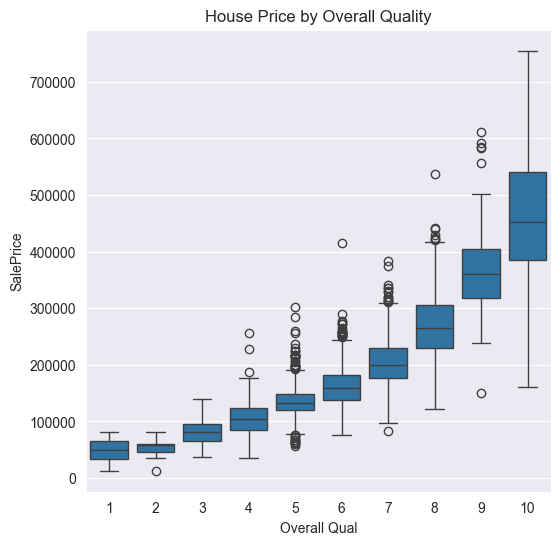

In [15]:
plt.figure(figsize=(6,6))

sns.boxplot(data=df,x='Overall Qual',y='SalePrice')
title = plt.title('House Price by Overall Quality')


Living Area<br>

Living area has a linear relationship with house price. In the scatter plot below, we can clearly see some outliers in the data, especially the three houses in the lower-right corner with living area greater than 4000 sqft and price lower than $200,000.

Corelation :  0.7067799209766268


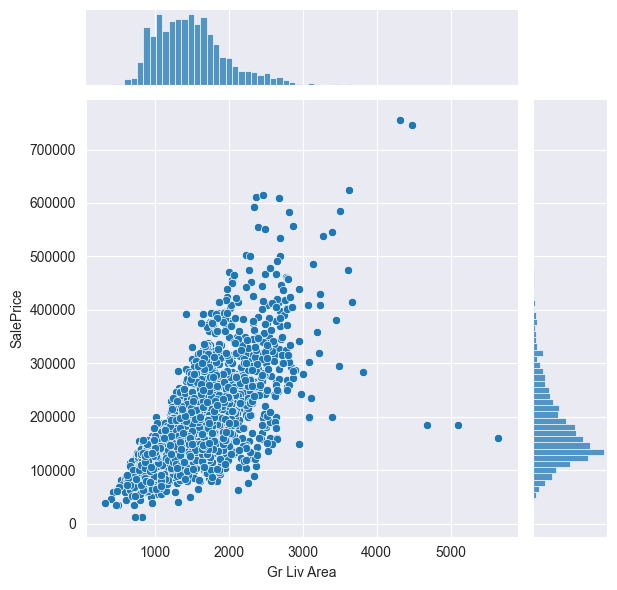

In [16]:
def plotcorrelation(variables):
    '''
    1.Print correlation of two variable 
    2.create joint plot of two variables
    '''
    # Print Corelation
    print(f"Corelation : ",df[[variables[0],variables[1]]].corr().iloc[0,1])

    sns.jointplot(data=df,
                   x=variables[0],
                   y=variables[1],
                   )

    # Create jointplot     


plotcorrelation(['Gr Liv Area','SalePrice'])

GarageCars

Interestingly, houses with garage which can hold 4 cars are cheaper than houses with 3-car garages

Text(0.5, 1.0, 'House Price by Garage Size')

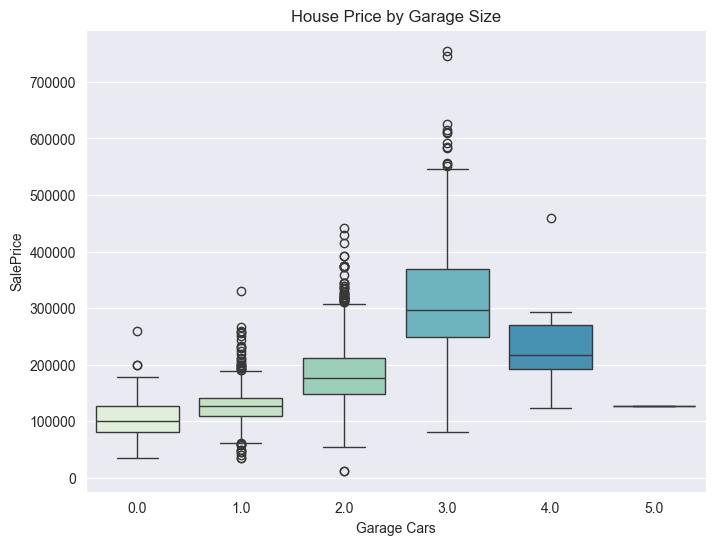

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data=df, palette='GnBu')
plt.title('House Price by Garage Size')

Year Built

The age of the house also plays an important role in its price. Newer houses have higher average prices. There are several houses built before 1900 having a high price.

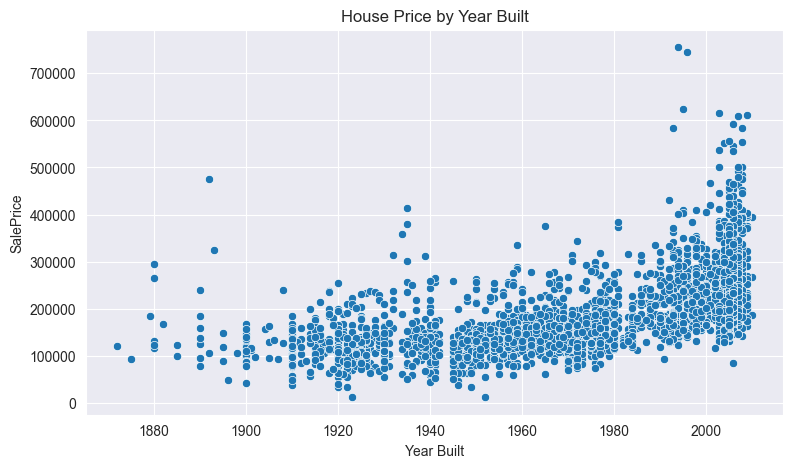

In [18]:
plt.figure(figsize=(9,5))

sns.scatterplot(data=df,x='Year Built',y='SalePrice')

title = plt.title('House Price by Year Built')

2.3. Categorical Variables<br>
Using ANOVA, I have identified 15 categorical features having p-values lower than 0.01:

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, SelectKBest

df_encoded = df.copy()  # Createing a copy of DataFrame

# selecting only categorical columns and filling 'nan' with 'None'
df_encoded=df_encoded.select_dtypes(include='object').fillna('None') 

df_encoded=df_encoded.astype(str) # converting all data into string

  
# Iterating through each column
for column in df_encoded.columns:
        label_encoder = LabelEncoder()
        # Fit and transform the column using LabelEncoder
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains numerical values for all categorical columns
        
# Finding f_vale and p_values
f_value,p_value=f_classif(df_encoded,y)  

Features_DF=pd.DataFrame({'Feature_name':df_encoded.columns,'P_value':p_value})

# features which has p-value < 0.001

Features_DF[Features_DF['P_value']<0.001].sort_values('P_value').Feature_name


21         Bsmt Qual
1             Street
30      Kitchen Qual
18        Exter Qual
10       Condition 2
34     Garage Finish
33       Garage Type
0          MS Zoning
28       Central Air
20        Foundation
26           Heating
5          Utilities
37       Paved Drive
23     Bsmt Exposure
27        Heating QC
3          Lot Shape
38           Pool QC
36       Garage Cond
35       Garage Qual
13        Roof Style
17      Mas Vnr Type
42    Sale Condition
14         Roof Matl
32      Fireplace Qu
7         Land Slope
8       Neighborhood
Name: Feature_name, dtype: object

* we are selecting below 15 categorical features<br>
[
    'Street', 'Land Slope', 'Neighborhood', 'Condition 2', 'Roof Matl', 'Exter Qual', 'Bsmt Qual',
    'Bsmt Exposure', 'Kitchen Qual', 'Lot shape','Garage Finish','Garage Type','MS Zoning','foundation','Sale Condition'
]

Let's explore some of them.

In [20]:
def visualizeCatFeature(feature):
    """
    Visualize the relationship between `SalePrice` and categorical feature using box plots
    """
    # Descending order of levels sorted by median SalePrice
    featOrder = df.groupby([feature]).SalePrice.median().sort_values(ascending=False).index

    # Create box plot
    sns.boxplot(x=feature,
                y='SalePrice',
                data=df,
                order=featOrder,
                palette='GnBu_r')

Neighborhood<br>

There is a big difference in house prices among neighborhood in Ames. The top 3 expensive neighborhoods are StoneBr, NridgHt and NoRidge with median house prices of approximately $300,000, three times as high as the median of the 3 cheapest neighborhoods, which are IDOTRR ,BrDale and MeadowV.

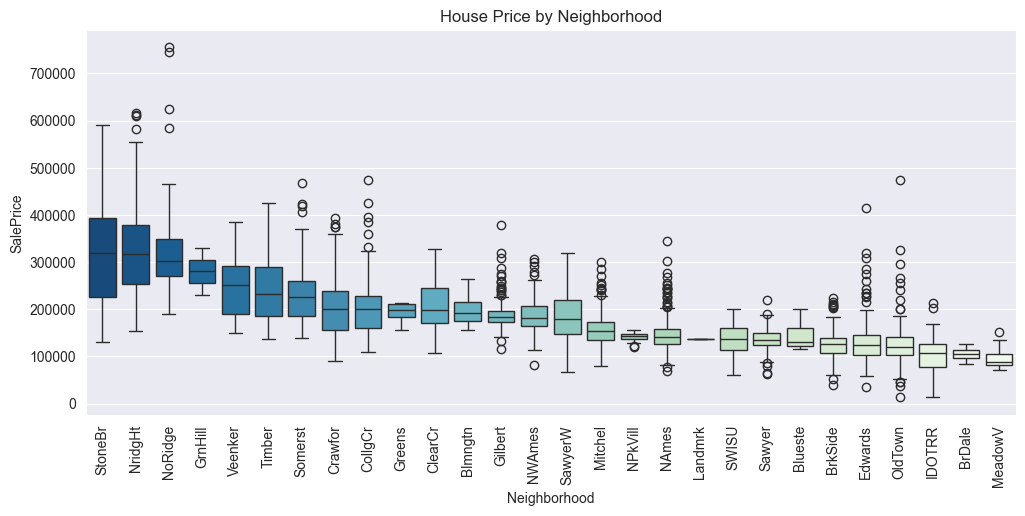

In [21]:
plt.figure(figsize=(12,5))
visualizeCatFeature('Neighborhood')
title=plt.title('House Price by Neighborhood')
plt.xticks(rotation=90);

Roof Material<br>

Houses using Wood Shingles roof are the most expensive with price ranging from $300,000 to \$450,000. There are also a lot of expensive houses using Standard Composite Shingle roof

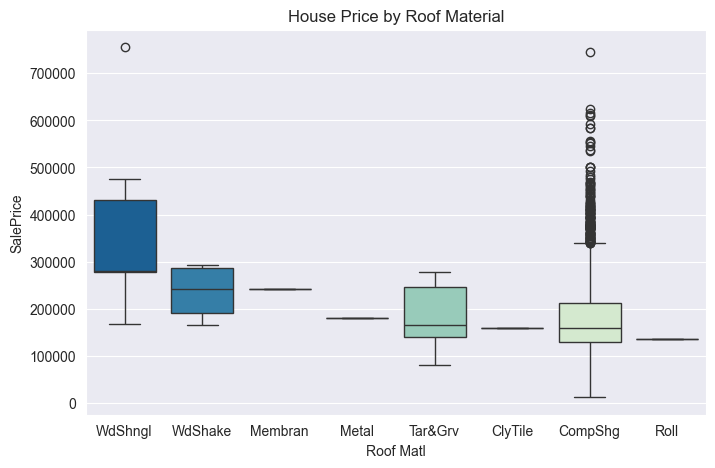

In [22]:
plt.figure(figsize=(8,5))
visualizeCatFeature('Roof Matl')
title = plt.title('House Price by Roof Material')

Kitchen Quality<br>

Kitchen Quality is another important feature to predict house price. There is a very big difference in price between houses with different kitchen quality. For example, the average price difference between a house with a good kitchen and one with an excellent kitchen is about $120,000.

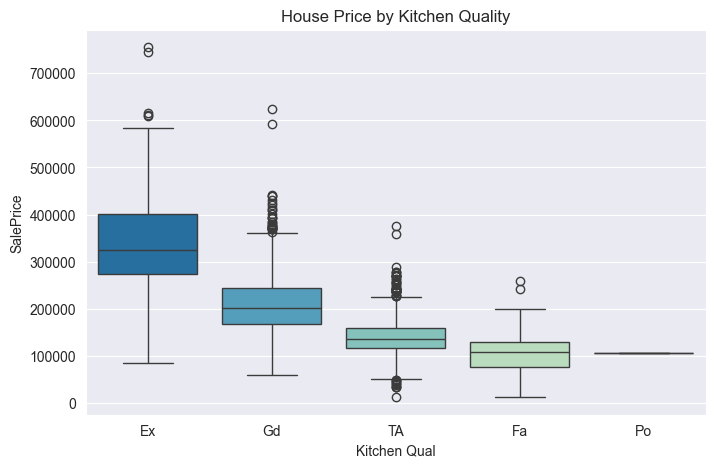

In [23]:
plt.figure(figsize=(8,5))
visualizeCatFeature('Kitchen Qual')
title = plt.title('House Price by Kitchen Quality')

Condition 2 <br>
Lot of houses with Norm conditions have higher prices 

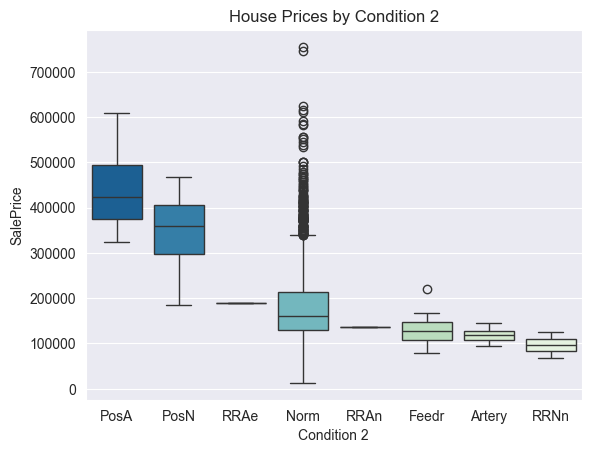

In [24]:
visualizeCatFeature('Condition 2')
title =plt.title("House Prices by Condition 2")

2.4. Correlations

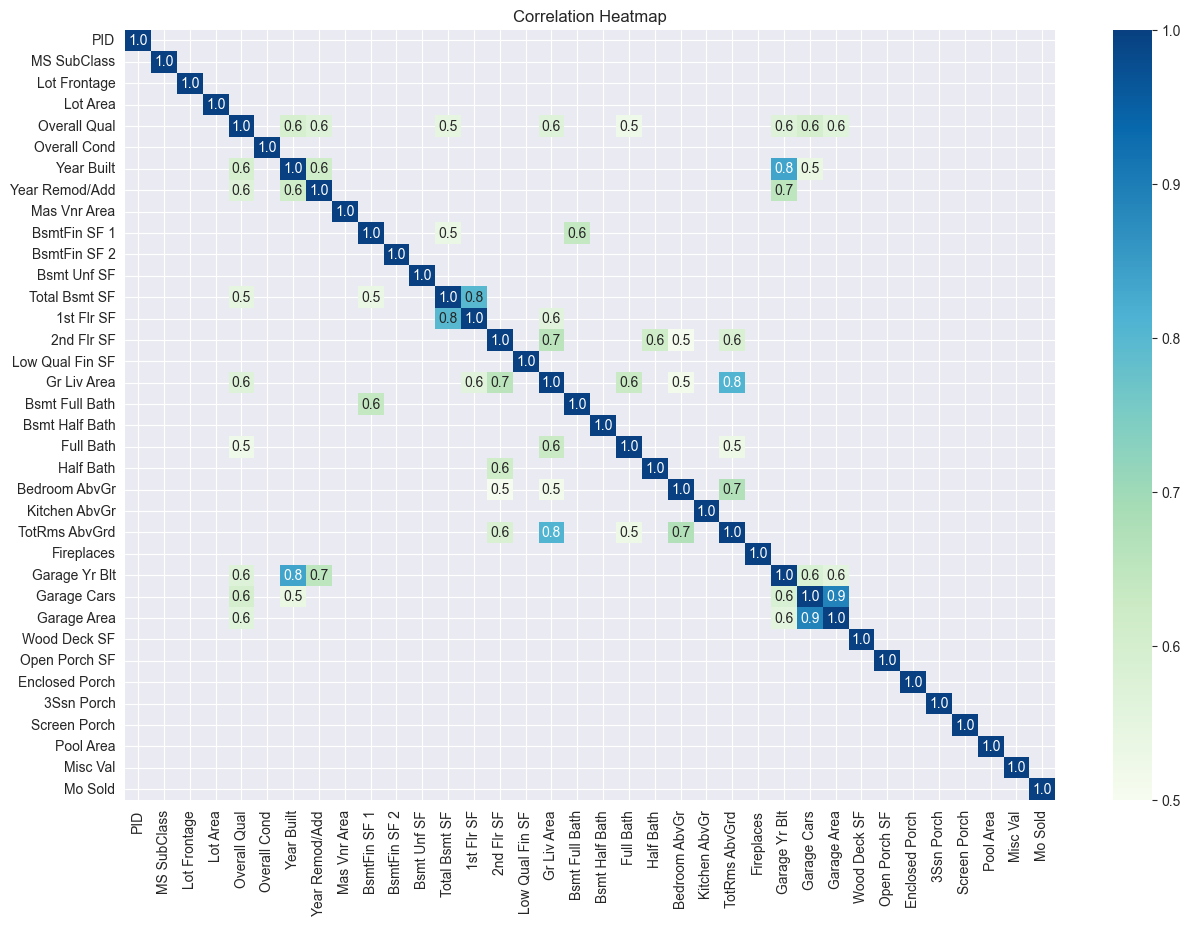

In [25]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = X.select_dtypes(exclude='object').iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap 
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')


There is multicollinearity in our training data. Below features are highly correlated:

- GarageCars and GarageArea
- GarageYrBlt and YearBuilt
- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd
Multicolliniearity has a negative impact on our prediction models and makes standard errors of our estimates increase. Therefore, for each pair of highly correlated features, I will remove a feature that has a lower correlation with SalePrice.

2.5. Missing Values<br>
Most machine learning algorithms give an error when we train them on data with missing values. Therefore, it's important to identify them before deciding how to handle them (drop features or impute missing value).

In [26]:
missing_data_count=df.isnull().sum()
missing_data_percentage=missing_data_count/len(df)*100

missing_data=pd.DataFrame({
                        'Count':missing_data_count,
                        'Percentage':missing_data_percentage
                        })

missing_data=missing_data[missing_data['Count']>0]
missing_data=missing_data.sort_values('Count',ascending=False)

print(f"There are total {len(missing_data)} columns which are missing data : \n \n",missing_data)

There are total 27 columns which are missing data : 
 
                 Count  Percentage
Pool QC          2917   99.556314
Misc Feature     2824   96.382253
Alley            2732   93.242321
Fence            2358   80.477816
Mas Vnr Type     1775   60.580205
Fireplace Qu     1422   48.532423
Lot Frontage      490   16.723549
Garage Cond       159    5.426621
Garage Qual       159    5.426621
Garage Finish     159    5.426621
Garage Yr Blt     159    5.426621
Garage Type       157    5.358362
Bsmt Exposure      83    2.832765
BsmtFin Type 2     81    2.764505
Bsmt Cond          80    2.730375
Bsmt Qual          80    2.730375
BsmtFin Type 1     80    2.730375
Mas Vnr Area       23    0.784983
Bsmt Half Bath      2    0.068259
Bsmt Full Bath      2    0.068259
BsmtFin SF 1        1    0.034130
Garage Cars         1    0.034130
Garage Area         1    0.034130
Total Bsmt SF       1    0.034130
Bsmt Unf SF         1    0.034130
BsmtFin SF 2        1    0.034130
Electrical          1    0

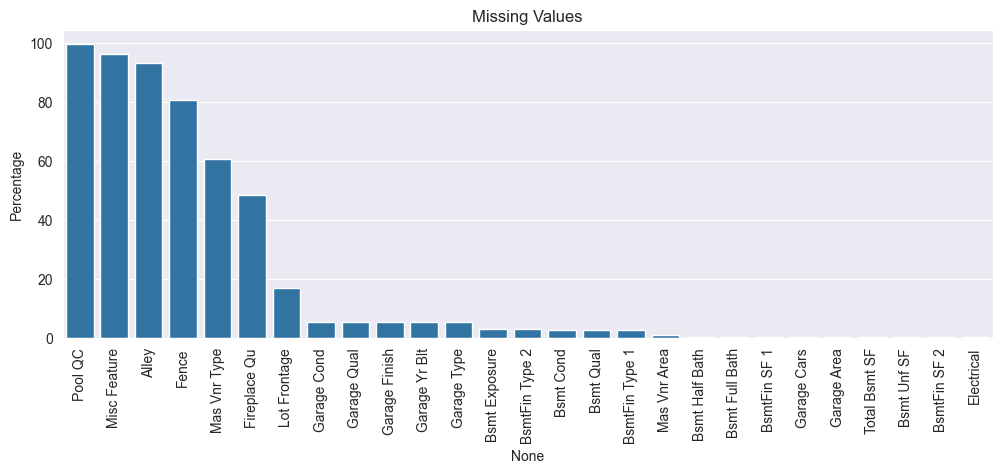

In [27]:
plt.figure(figsize=(12,4))
sns.barplot(x=missing_data.index,
            y=missing_data.Percentage)
plt.xticks(rotation=90);
title = plt.title("Missing Values")

With some basic understandings of the data set and features, let's move to data preprocessing and modeling steps.

3. Data Preprocessing and Feature Engineering<br>

3.1. Missing Values

There are 27 features that have missing values. I will divide them into three groups based on the data description:

* Group 1 - Categorical variables where NA means no feature: Pool QC, Misc Feature, Alley, Fence, Fireplace Qu, Garage Type, Garage Finish, Garage Qual, Garage Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type1, Bsmt Fin Type2, Mas Vnr Type (15 variables)

For this group I will impute NA with 'None'.

* Group 2 - Numerical variables where NA means no feature: Garage Area, Garage Cars, BsmtFin SF1, BsmtFin SF2, BsmtUnf SF, Total BsmtSF, BsmtFull Bath, BsmtHalf Bath, Mas Vnr Area (9 variables)

For this group I will impute NA with 0.

* Group 3 - Other variables: Electrical, Lot Frontage , Garage Yr Blt (3 variables)

I will impute Electrical with their modes,
* impute Lot Frontage with its mean,
* impute Garage Yr Blt with Year Built.

In [28]:
from sklearn.impute import SimpleImputer

# Group 1:
group_1 = [
    'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Type',
    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Mas Vnr Type']

X[group_1]=X[group_1].fillna("None")

# Group 2:
group_2 = [
    'Garage Area', 'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area'
]

X[group_2]=X[group_2].fillna(0)

# Group 3:
group_3a = ['Electrical', 'Lot Frontage' , 'Garage Yr']

imputer=SimpleImputer(strategy='most_frequent')

X['Electrical']=imputer.fit_transform(X[['Electrical']]).ravel()
X['Lot Frontage']=X['Lot Frontage'].fillna(X['Lot Frontage'].mean())
X['Garage Yr Blt']=X['Garage Yr Blt'].fillna(X['Year Built'])


Let's check whether there is any missing value left:

In [29]:
sum(X.isnull().sum())


0

Great! All missing values have been handled.

3.2. Outliers<br>
Because regression models are very sensitive to outlier, we need to be aware of them. Let's examine outliers with a scatter plot.

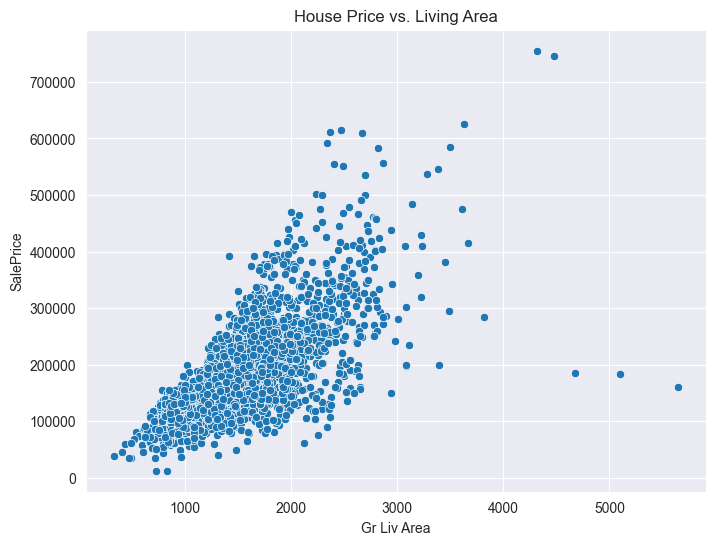

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
title = plt.title('House Price vs. Living Area')

There are Three observations lying separately from the rest. They have large living area but low price. They are the outliers that we are looking for. I will delete them from the training set.

In [31]:
outlier_index = df[(df['Gr Liv Area'] > 4000)
                           & (df['SalePrice'] < 200000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)


3.3. Feature Engineering

3.3.1. Create New Variables<br>


In this step I will create new features from weaker features in the training data. For example, the surface area of each floor has low correlation with house price; however, when we sum them up, the relationship becomes much stronger. In fact, Total Sq Feet becomes the strongest feature in the dataset. The new features I will create are total square feet, total number of bathrooms and age of the house.

In [32]:
X['total Sq Feet'] = X['Total Bsmt SF'] + X['1st Flr SF'] + X['2nd Flr SF']
X['total Bathroom'] = X['Full Bath'] + X['Bsmt Full Bath'] + 0.5 * (X['Half Bath'] + X['Bsmt Half Bath'])
X['house Age'] = X['Yr Sold'] - X['Year Built']

3.3.2. Label Encoding<br>

Ordinal categorical features are label encoded.

In [33]:
from sklearn.preprocessing import LabelEncoder

# Ordinal categorical columns
label_encoding_cols = [
    "Alley", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2",
    "Bsmt Qual", "Exter Cond", "Exter Qual", "Fireplace Qu", "Functional",
    "Garage Cond", "Garage Qual", "Heating QC", "Kitchen Qual", "Land Slope",
    "Lot Shape", "Paved Drive", "Pool QC", "Street", "Utilities"
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X[col] = label_encoder.fit_transform(X[col])

3.3.3. Transform Numerical Variables to Categorical Variables<br>

Because I have calculated age of houses, YearBuilt is no longer needed. However, YrSold could have a large impact on house price (e.g. In economic crisis years, house price could be lower). Therefore, I will transform it into categorical variables.

Like YrSold, some numerical variables don't have any ordinal meaning (e.g. MoSold, MSSubClass). I will transform them into categorical variables.

In [34]:
to_factor_cols = ['Yr Sold', 'Mo Sold', 'MS SubClass']

for col in to_factor_cols:
    X[col] = X[col].apply(str)

3.4. Skewness and Normalizing Variables<br>

Normal distribution is one of the assumption that linear regression relies on. Therefore, transfoming skewed data will help our models perform better.

First, let's examine the target variable SalePrice with Distribution plot and Quantile-Quantile plot.

Target variable

In [35]:
from scipy import stats
from scipy.stats import norm

In [36]:
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

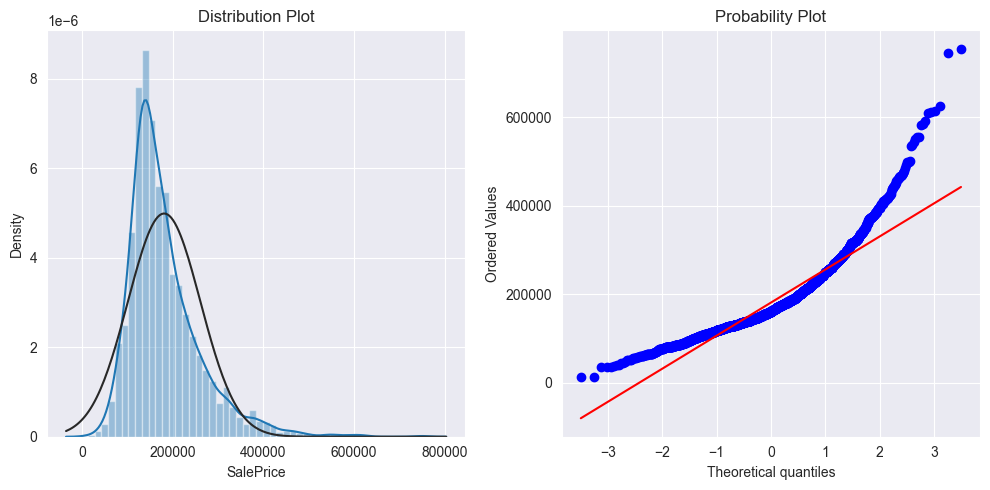

In [37]:
normality_plot(y)

One of the methods to normalize right-skewed data is using log transformation because big values will be pulled to the center. However, log(0) is Nan, so I will use log(1+X) to fix skewness instead.

In [38]:
y = np.log(1 + y)

And this is SalePrice after log transformation. The sknewness has been fixed.

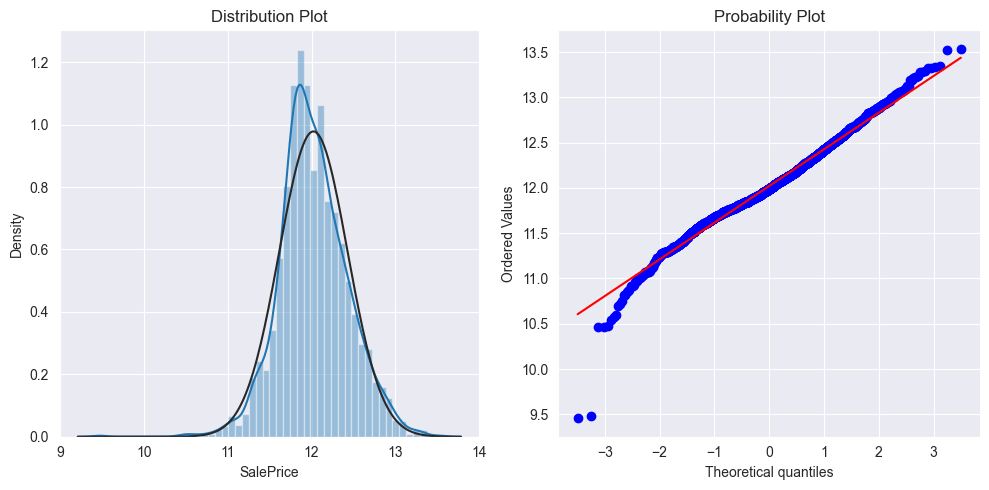

In [39]:
normality_plot(y)

In the next step I will examine skewness in the rest of numerical variables and use log transformation to fix them,

Fixing skewness in other numerical variables

If skewness is less than -1 or greater than 1, the distribution is highly skewed.<br>
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.<br>
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.<br>

Below are skewed features in our original train data.

In [40]:
skewness=X.select_dtypes(exclude='object').skew().sort_values(ascending=False)
skewness=abs(skewness)
skewness[skewness>0.75]

Utilities          34.037571
Misc Val           22.232593
Pool Area          17.728333
Lot Area           13.185490
Low Qual Fin SF    12.111843
3Ssn Porch         11.397832
Land Slope          4.985318
Kitchen AbvGr       4.311274
BsmtFin SF 2        4.138347
Enclosed Porch      4.012130
Screen Porch        3.955084
Bsmt Half Bath      3.954525
Mas Vnr Area        2.600195
Open Porch SF       2.495253
Wood Deck SF        1.844800
Lot Frontage        1.223545
Gr Liv Area         0.976593
1st Flr SF          0.951201
Bsmt Unf SF         0.924561
2nd Flr SF          0.865825
BsmtFin SF 1        0.830800
Bsmt Exposure       1.109769
Exter Qual          1.792089
Exter Cond          2.503914
Bsmt Cond           2.873845
Paved Drive         2.985981
BsmtFin Type 2      3.029992
Garage Qual         3.081181
Garage Cond         3.603630
Functional          3.826941
Street             15.529583
Pool QC            18.908769
dtype: float64

Let's check normality of Gr Liv Area:

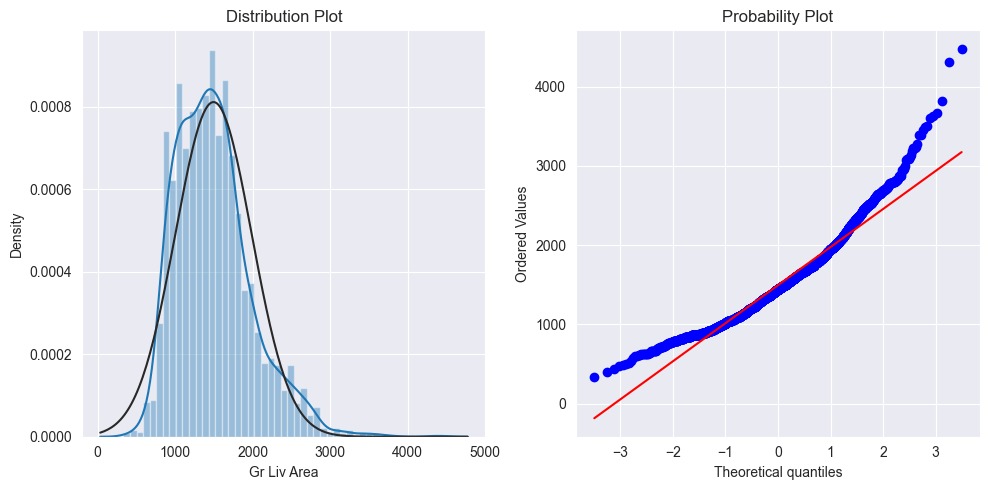

In [41]:
normality_plot(X['Gr Liv Area'])

In [42]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for col in skewed_cols:
    X[col] = np.log(1 + X[col])

Below is normality of Gr Liv Area after log-transformation. Skewness has been fixed.

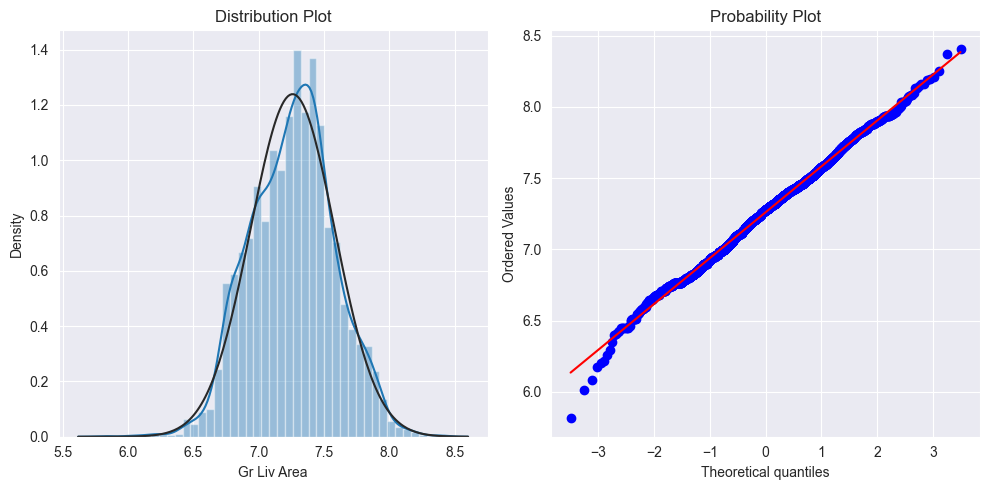

In [43]:
normality_plot(X['Gr Liv Area'])


3.5. Feature Scaling<br>

Except for Decision Tree and Random Forest, it is highly recommended to standardize the data set before running machine learning algorithms since optimization methods and gradient descent run and converge faster on similarly scaled features.

I will use RobustScaler to transform the training data.<br>

The RobustScaler is particularly useful when dealing with data that contains outliers. Outliers can greatly influence the mean and standard deviation, which are often used in traditional scaling methods like Min-Max Scaling or Standard Scaling (Z-score normalization). The RobustScaler uses the median and the interquartile range (IQR) to scale the features. The median is less sensitive to outliers compared to the mean, and the IQR is a measure of statistical dispersion that is less affected by outliers than the standard deviation.

In summary, RobustScaler is a good choice when you have data with outliers and you want to scale your features in a way that is robust to the presence of these outliers. It helps prevent outliers from unduly influencing the scaling of the data.

In [44]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

3.6. One-hot Encoding

In [45]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2927, 245)


4. Modeling

In model evaluation, it's a common practice to split the entire training data into 2 sets of data (train and test). However, a model may work very well on a set of test data but have a poor performance on other sets of unseen data.

A solution to this problem is a procedure called cross-validation (CV). In the example below, under the basic approach, called k-fold CV, the training set is split into 5 smaller sets. Then, for each fold, a model is trained using the other 4 folds and evaluated on the remaining fold. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.

I will write a function to get the Root Mean Squared Logarithmic Error (RMSLE) for my models using cross-validation. There is one note here: because I have transformed the target variable to log(1+y) , the Mean Squared Error for log(1+y) is the Mean Squared Logarithmic Error for SalePr

In [46]:
# Splitting the data into TRaining , Test and validation set 

from sklearn.model_selection import train_test_split

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.30, random_state=42)

X_test,X_validation,y_test,y_validation=train_test_split(X_other,y_other,test_size=0.10,random_state=101)

In [47]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def getRMSLE(model):
    """
    Return the average RMSLE over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    rmse = np.sqrt(-cross_val_score(
        model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))

    return rmse.mean()

4.1. Regularized Regressions

In [48]:
from sklearn.linear_model import Ridge, Lasso

4.1.1. Ridge Regression<br>
In the regularized linear regression (Ridge), we try to minimize cost function:

J(θ)=1/2m(∑(hθ(x(i))−y(i))^2)+λ/2m(∑θ^2))
 
where  λ
  is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overall cost J. As the magnitudes of the model parameters  θj
  increase, the penalty increases as well.

I will find the  λ
  that gives me the smallest RMSLE from cross-validation:

Best lambda: 22.13
RMSLE: 0.12043806958224548


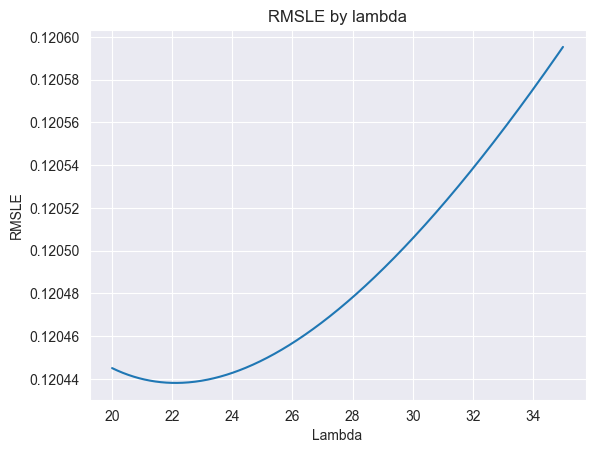

In [49]:

lambda_list = list(np.linspace(20, 35, 501))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())


In [50]:
ridge = Ridge(alpha=24.83)

4.1.2. Lasso Regression<br>

Lasso Regression is very similar to Ridge regression. One difference is that in the regularization term, instead of using sum of squared of  θ
 , we use sum of absolute value of  θ :

J(θ)=1/2*m(∑(hθ(x(i))−y(i))^2)+λ/2m(∑j=1n|θ|)
 
Another big difference is that Ridge Regresion can only shrink parameters close to zero while Lasso Regression can shrink some parameters all the way to 0. Therefore, we can use Lasso Regression to perform feature selection and regression.

With the same method above, the best lambda_ for my Lasso model is 0.00065.

Best lambda: 7e-05
RMSLE: 0.12455563187442982


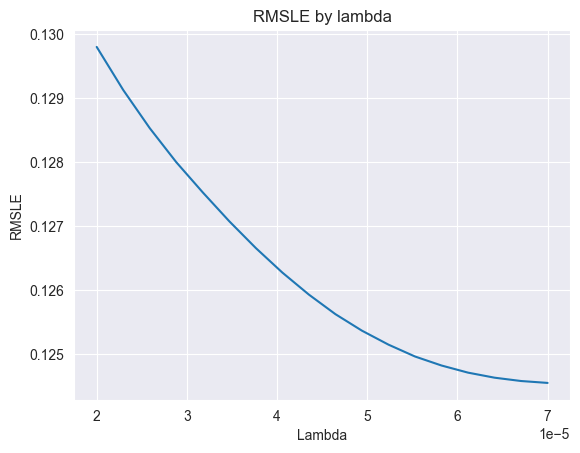

In [51]:
lambda_list = list(np.linspace(0.00002, 0.00007, 18))
rmsle_lasso = [
    getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list
]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

In [52]:
lasso = Lasso(alpha=0.000052352941176470584, max_iter=100000)

4.2. XGBoost<br>

Following the below complete guide of parameter tuning for XGBoost, let's tune and find the best parameter for n_estimators max_depth min_child_weight gamma subsample colsample_bytree reg_alpha reg_lambda learning_rate.<br>


https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/?fbclid=IwAR1NTAXqgYzjOOFw3qOV5DrcItwNoM73iPvWggnuyVR1PbvORiEUjRunipo 

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Setting up parameter grid

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 2),
}

# Model instance 

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Using Randomized search CV to find best parameters of model

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,                          # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=kfold,
    random_state=42
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=Non...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000256480D2DE0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000256480B3860>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002564BFEF9B0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002564A8A95E0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [88]:
random_search.best_params_

{'colsample_bytree': 0.7587135308855554,
 'learning_rate': 0.02523055931181908,
 'max_depth': 5,
 'n_estimators': 570,
 'reg_alpha': 0.027616771873704704,
 'reg_lambda': 1.1577297910151174,
 'subsample': 0.7753896492072347}

In [99]:
xgb_model=XGBRegressor(objective='reg:squarederror', random_state=42,
                 colsample_bytree=0.7587135308855554,
                 learning_rate= 0.02523055931181908,
                 max_depth= 5,
                 n_estimators=570,
                 reg_alpha= 0.027616771873704704,
                 reg_lambda= 1.1577297910151174,
                 subsample= 0.7753896492072347
                 )

In [101]:
xgb_model.fit(X_train,y_train)  # Fititng on training data 

getRMSLE(XGB)

0.12251003807927723

4.3. LightGBM<br>


LightGBM is a powerful gradient boosting framework based on decision tree algorithm. Like XGBoost, LightGBM has a high performance on large data sets but much faster training speed than XGBoost does. Following below guide, I have tuned the parameters num_leaves min_data_in_leaf max_depth bagging_fraction feature_fraction max_bin. As you can see in the RMSLE reported below, for this data set LightGBM has better performance than XGBoost.

https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/?fbclid=IwAR3uYr9U1VDaqh_jEn1cjvMyjEWVHKMaDm_Q9yD1y08OkGBywRR0qpuhhtw

In [140]:
from lightgbm import LGBMRegressor

In [141]:
lgb = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=730,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=55,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11
                    )


In [165]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

import seaborn as sns
from sklearn.metrics import mean_squared_error

def ML_Scorer(model):
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Create a DataFrame for Seaborn
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    # Use Seaborn to create a scatterplot
    sns.regplot(x='Actual', y='Predicted', data=results_df)
    
    return model.__class__.__name__, RMSE

In [153]:
print(Scorer(lasso))
print(Scorer(ridge))
print(Scorer(xgb_model))
print(Scorer(lgb))

('Lasso', 0.1056840429101058)
('Ridge', 0.10301909401834065)
('XGBRegressor', 0.10272014302116297)
('LGBMRegressor', 0.10017441830641256)


5. Conclusion<br>

In this project, I have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, I performed data preprocessing and feature engineering. Finally, I train regularized regression models (Ridge, Lasso), XGBoost and LightGBM, . By the time I write this notebook, my best model has Root Mean Squared Error  of 0.10017441830641256(LGBMRegressor).

('XGBRegressor', 0.10272014302116297)

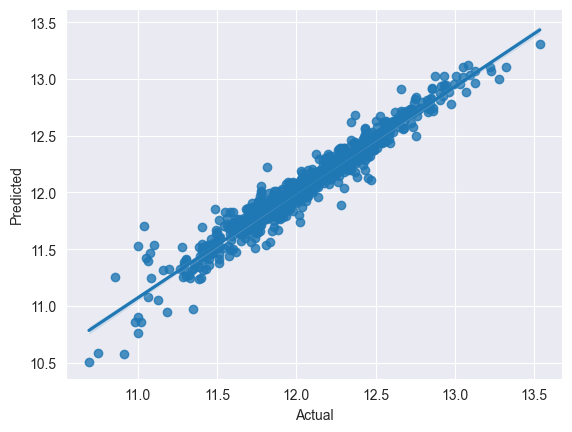

In [168]:
ML_Scorer(xgb_model)